In [1]:

import requests


import torch


from PIL import Image


from transformers import VisionEncoderDecoderModel, ViTImageProcessor, GPT2TokenizerFast

from tqdm import tqdm
device = "cuda" if torch.cuda.is_available() else "cpu"

In [2]:

model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning").to(device)


tokenizer = GPT2TokenizerFast.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

image_processor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

In [3]:

import urllib.parse as parse
import os

def check_url(string):
    try:
        result = parse.urlparse(string)
        return all([result.scheme, result.netloc, result.path])
    except:
        return False

# Load an image
def load_image(image_path):
    if check_url(image_path):
        return Image.open(requests.get(image_path, stream=True).raw)
    elif os.path.exists(image_path):
        return Image.open(image_path)

In [4]:

def get_caption(model, image_processor, tokenizer, image_path):
    image = load_image(image_path)

    img = image_processor(image, return_tensors="pt").to(device)

    
    output = model.generate(**img)

   
    caption = tokenizer.batch_decode(output, skip_special_tokens=True)[0]

    return caption
     

In [5]:

from IPython.display import display
     

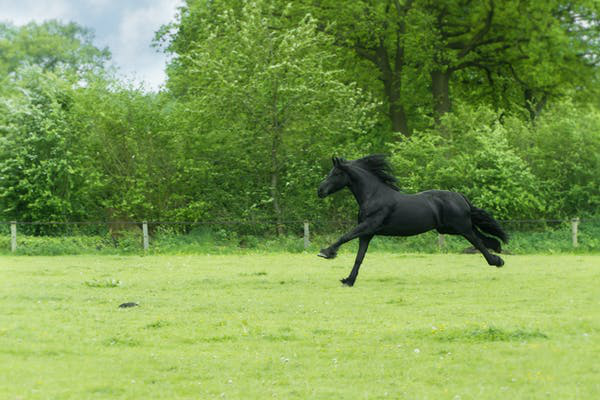

C:\Users\ACER\anaconda3\Lib\site-packages\transformers\generation\utils.py:1260: UserWarning: Using the model-agnostic default `max_length` (=20) to control thegeneration length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


'a black horse running through a grassy field '

In [6]:

url = "https://images.pexels.com/photos/101667/pexels-photo-101667.jpeg?auto=compress&cs=tinysrgb&w=600"

display(load_image(url))


get_caption(model, image_processor, tokenizer, url)
     

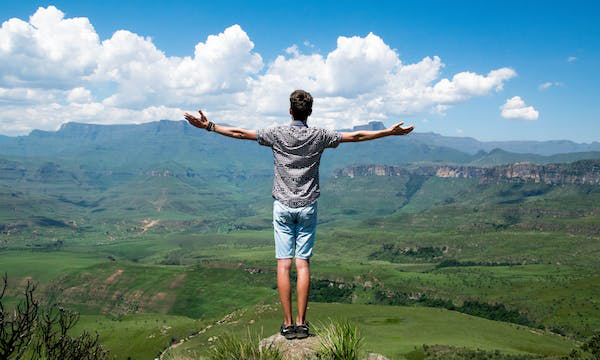

'a man standing on top of a hill with a mountain '

In [9]:
# Loading URLs
url ="https://images.pexels.com/photos/103123/pexels-photo-103123.jpeg?auto=compress&cs=tinysrgb&w=600"
display(load_image(url))

# Display Caption
get_caption(model, image_processor, tokenizer, url)
     